In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
with open("./data_inputs/day20_input.txt") as f:
    input = f.read().split("\n")

In [3]:
algo = input[0]
input_img = input[2:]

bin_img = np.array([list(map(lambda x: 1 if x=='#' else 0, l)) for l in input_img], dtype=np.uint8)
lbin_img0 = np.zeros((bin_img.shape[0]+4, bin_img.shape[1]+4), dtype=np.uint8)
lbin_img0[2:-2, 2:-2] = bin_img

In [4]:
def plot_img(img):
    plt.imshow(img)
    #plt.imshow(img[40:160, 40:160])
    plt.rcParams["figure.figsize"] = (10,10)
    plt.show()

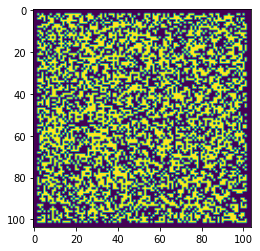

In [5]:
plot_img(lbin_img0)

In [6]:
def decoder(_lbin_img, x, y):
    bin_num = str(_lbin_img[x-1:x+2, y-1:y+2].reshape(-1))[1:19:2]
    if algo[int(bin_num, 2)] == '.':
        return 0
    else:
        return 1

In [7]:
def img_enhancement(lbin_img, size, it):
    lbin_img1 = np.ones((size+2, size+2), dtype=np.uint8)
    xmin, ymin, xmax, ymax = 1, 1, size-1, size-1       

    for i in range(xmin, xmax, 1):
        for j in range(ymin, ymax, 1):
            lbin_img1[i+1, j+1] = decoder(lbin_img, i, j)

    size = size + 2

    lbin_img2 = np.zeros((size+2, size+2), dtype=np.uint8)
    xmin, ymin, xmax, ymax = 1, 1, size-1, size-1       

    for i in range(xmin, xmax, 1):
        for j in range(ymin, ymax, 1):
            lbin_img2[i+1, j+1] = decoder(lbin_img1, i, j)

    if it == 24:
        print("Result1:", np.sum(lbin_img2))

    if it > 0:
        img_enhancement(lbin_img2, lbin_img2.shape[0], it-1)
    else:
        print("Result2:", np.sum(lbin_img2))
        plot_img(lbin_img2)

        return "Done"

Result1: 5179
Result2: 16112


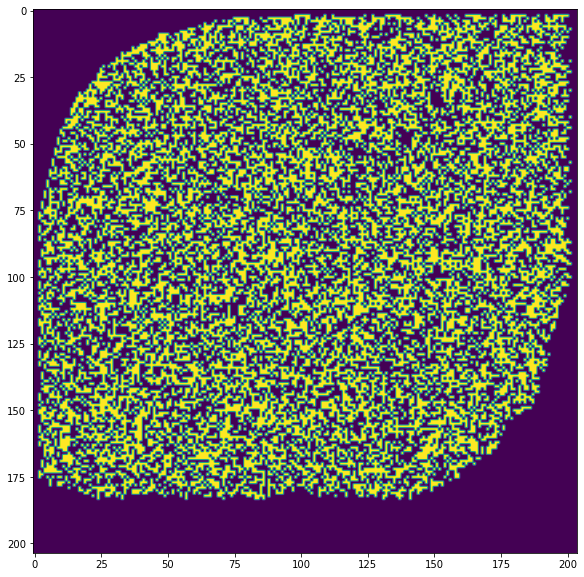

In [8]:
img_enhancement(lbin_img0, lbin_img0.shape[0], 24)